# Check the quality of the structures

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

from rna_motif_library.util import add_motif_indentifier_columns, get_pdb_ids

In [67]:
def add_residue_count(df: pd.DataFrame) -> pd.DataFrame:
    """Add a column counting non-gap residues in each sequence.

    Args:
        df: DataFrame containing motif data with 'msequence' column

    Returns:
        DataFrame with additional 'residue_num' column counting non-gap characters
    """
    df["residue_num"] = df["msequence"].str.replace("-", "").str.len()
    return df

In [113]:
df_motifs = pd.read_csv("../data/summaries/all_motifs_issues.csv")
# df_motifs = pd.read_json("../data/summaries/motifs/non_redundant_motifs_summary.json")
# df_motifs["residue_num"] = df_motifs["num_residues"]
df_motifs = add_motif_indentifier_columns(df_motifs, "motif_name")
df_motifs = add_residue_count(df_motifs)
df_motifs["is_large_motif"] = (df_motifs["residue_num"] > 50) & (
    df_motifs["motif_type"] != "NWAY"
)

In [112]:
df_motifs.query("pdb_id == '9MDS' and contains_helix == 1")

UndefinedVariableError: name 'contains_helix' is not defined

In [96]:
df_torision_scores = pd.read_csv("../torison_scores.csv")

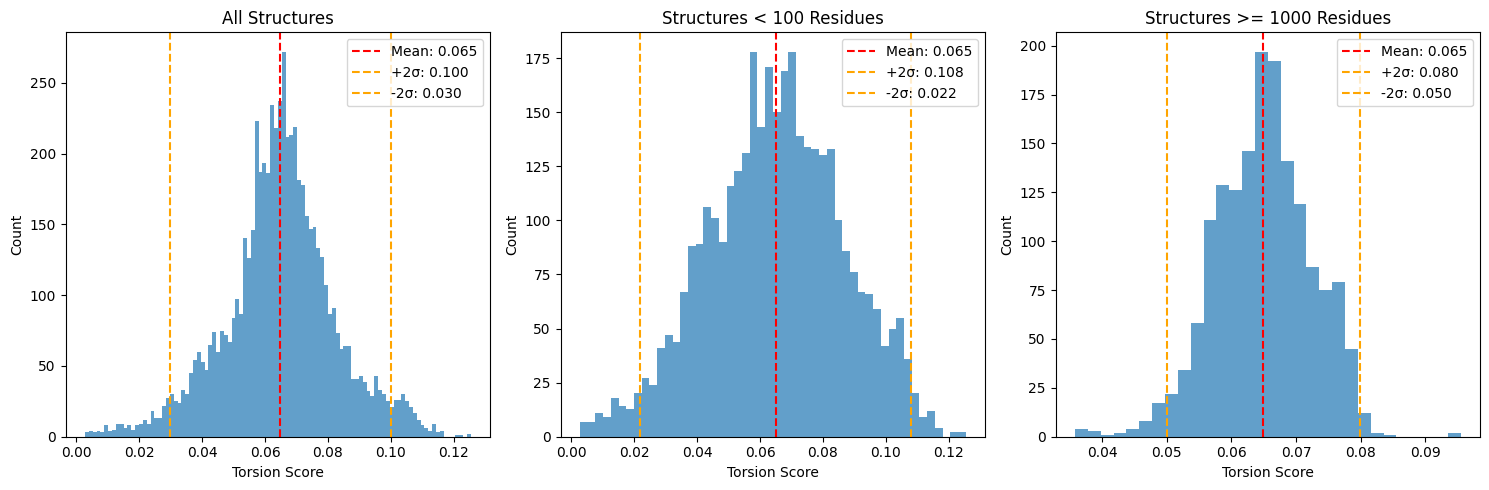

Summary Statistics:
All structures: 6288 structures, Mean: 0.065 ± 0.018
< 100 residues: 3545 structures, Mean: 0.065 ± 0.022
>= 1000 residues: 1617 structures, Mean: 0.065 ± 0.007

Structure counts by category:
All structures: 6288 structures
< 100 residues: 3545 structures
>= 1000 residues: 1617 structures
100-999 residues: 1126 structures

Structures outside 2σ:
All structures: 411 structures (6.5%)
< 100 residues: 146 structures (4.1%)
>= 1000 residues: 53 structures (3.3%)


In [97]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# All scores
axes[0].hist(df_torision_scores["score"], bins=100, alpha=0.7)
axes[0].set_title("All Structures")
axes[0].set_xlabel("Torsion Score")
axes[0].set_ylabel("Count")
mean_all = df_torision_scores["score"].mean()
std_all = df_torision_scores["score"].std()
axes[0].axvline(mean_all, color="red", linestyle="--", label=f"Mean: {mean_all:.3f}")
axes[0].axvline(
    mean_all + 2 * std_all,
    color="orange",
    linestyle="--",
    label=f"+2σ: {mean_all + 2*std_all:.3f}",
)
axes[0].axvline(
    mean_all - 2 * std_all,
    color="orange",
    linestyle="--",
    label=f"-2σ: {mean_all - 2*std_all:.3f}",
)
axes[0].legend()

# Structures with < 100 residues
small_structures = df_torision_scores[df_torision_scores["num_residues"] < 100]
axes[1].hist(small_structures["score"], bins=50, alpha=0.7)
axes[1].set_title("Structures < 100 Residues")
axes[1].set_xlabel("Torsion Score")
axes[1].set_ylabel("Count")
mean_small = small_structures["score"].mean()
std_small = small_structures["score"].std()
axes[1].axvline(
    mean_small, color="red", linestyle="--", label=f"Mean: {mean_small:.3f}"
)
axes[1].axvline(
    mean_small + 2 * std_small,
    color="orange",
    linestyle="--",
    label=f"+2σ: {mean_small + 2*std_small:.3f}",
)
axes[1].axvline(
    mean_small - 2 * std_small,
    color="orange",
    linestyle="--",
    label=f"-2σ: {mean_small - 2*std_small:.3f}",
)
axes[1].legend()

# Structures with >= 1000 residues
large_structures = df_torision_scores[df_torision_scores["num_residues"] >= 1000]
axes[2].hist(large_structures["score"], bins=30, alpha=0.7)
axes[2].set_title("Structures >= 1000 Residues")
axes[2].set_xlabel("Torsion Score")
axes[2].set_ylabel("Count")
mean_large = large_structures["score"].mean()
std_large = large_structures["score"].std()
axes[2].axvline(
    mean_large, color="red", linestyle="--", label=f"Mean: {mean_large:.3f}"
)
axes[2].axvline(
    mean_large + 2 * std_large,
    color="orange",
    linestyle="--",
    label=f"+2σ: {mean_large + 2*std_large:.3f}",
)
axes[2].axvline(
    mean_large - 2 * std_large,
    color="orange",
    linestyle="--",
    label=f"-2σ: {mean_large - 2*std_large:.3f}",
)
axes[2].legend()

plt.tight_layout()
plt.show()

# Calculate structures outside 2σ for each category
outside_2sigma_all = df_torision_scores[
    (df_torision_scores["score"] > mean_all + 2 * std_all)
    | (df_torision_scores["score"] < mean_all - 2 * std_all)
]
outside_2sigma_small = small_structures[
    (small_structures["score"] > mean_small + 2 * std_small)
    | (small_structures["score"] < mean_small - 2 * std_small)
]
outside_2sigma_large = large_structures[
    (large_structures["score"] > mean_large + 2 * std_large)
    | (large_structures["score"] < mean_large - 2 * std_large)
]

# Print summary statistics
print("Summary Statistics:")
print(
    f"All structures: {len(df_torision_scores)} structures, Mean: {mean_all:.3f} ± {std_all:.3f}"
)
print(
    f"< 100 residues: {len(small_structures)} structures, Mean: {mean_small:.3f} ± {std_small:.3f}"
)
print(
    f">= 1000 residues: {len(large_structures)} structures, Mean: {mean_large:.3f} ± {std_large:.3f}"
)

# Print structure counts for each category
print(f"\nStructure counts by category:")
print(f"All structures: {len(df_torision_scores)} structures")
print(f"< 100 residues: {len(small_structures)} structures")
print(f">= 1000 residues: {len(large_structures)} structures")
print(
    f"100-999 residues: {len(df_torision_scores) - len(small_structures) - len(large_structures)} structures"
)

# Print structures outside 2σ
print(f"\nStructures outside 2σ:")
print(
    f"All structures: {len(outside_2sigma_all)} structures ({len(outside_2sigma_all)/len(df_torision_scores)*100:.1f}%)"
)
print(
    f"< 100 residues: {len(outside_2sigma_small)} structures ({len(outside_2sigma_small)/len(small_structures)*100:.1f}%)"
)
print(
    f">= 1000 residues: {len(outside_2sigma_large)} structures ({len(outside_2sigma_large)/len(large_structures)*100:.1f}%)"
)

In [98]:
df_motifs.iloc[0]

pdb_id                                     8Y0C
motif_name              HAIRPIN-4-CUGUUG-8Y0C-1
motif_type                              HAIRPIN
flanking_helices                              1
contains_helix                                0
has_singlet_pair                              0
has_singlet_pair_end                          0
mtype                                   HAIRPIN
msize                                         4
msequence                                CUGUUG
residue_num                                   6
is_large_motif                            False
Name: 0, dtype: object

In [99]:
# Count motifs with helix
df_motifs_issues_count = (
    df_motifs.query("contains_helix == 1")
    .groupby("pdb_id")
    .agg(count=("pdb_id", "size"))
    .reset_index()
)

# Count large motifs
df_motifs_large_count = (
    df_motifs.query("is_large_motif == True")
    .groupby("pdb_id")
    .agg(count_large=("pdb_id", "size"))
    .reset_index()
)

# Get all PDB IDs
pdb_ids = get_pdb_ids()

# Create a DataFrame with all PDB IDs and initialize counts to 0
all_pdb_df = pd.DataFrame({"pdb_id": pdb_ids, "count": 0, "count_large": 0})

# Merge with helix motif counts
df_result = pd.merge(
    all_pdb_df, df_motifs_issues_count, on="pdb_id", how="left", suffixes=("", "_helix")
)

# Merge with large motif counts
df_result = pd.merge(
    df_result, df_motifs_large_count, on="pdb_id", how="left", suffixes=("", "_large")
)

# Update counts: use existing counts where available, otherwise keep 0
df_result["count"] = df_result["count_helix"].fillna(df_result["count"]).astype(int)

# Handle count_large column - it might be renamed due to suffix conflicts
large_count_col = (
    "count_large_large" if "count_large_large" in df_result.columns else "count_large"
)
if large_count_col in df_result.columns:
    df_result["count_large"] = (
        df_result[large_count_col]
        .fillna(df_result["count_large"] if "count_large" in df_result.columns else 0)
        .astype(int)
    )
else:
    # If no large motifs exist at all, count_large column might be missing entirely
    df_result["count_large"] = 0

# Keep only the final columns
df_motifs_issues_count = df_result[["pdb_id", "count", "count_large"]]

In [100]:
df_motifs_issues_count.sort_values("count", ascending=False)

,pdb_id,count,count_large
6171,4V9O,54,0
158,4V5A,52,0
651,8P4V,51,0
4731,5TGM,50,0
1146,6C5L,48,1
...,...,...,...
2525,9FD2,0,0
2524,7X8A,0,0
2523,5G4T,0,0
2522,5LR4,0,0


In [101]:
df_merged = df_torision_scores.merge(df_motifs_issues_count, on="pdb_id", how="left")
df_merged = df_merged.query("num_residues > 1000")

In [105]:
df_merged = df_merged.sort_values("score", ascending=True)
df_merged.to_csv("../quality_check.csv", index=False)

In [87]:
df_merged.query("pdb_id == '7ASO'").iloc[0]

pdb_id              7ASO
score           0.035781
num_residues        4249
count                 33
count_large            9
Name: 1473, dtype: object

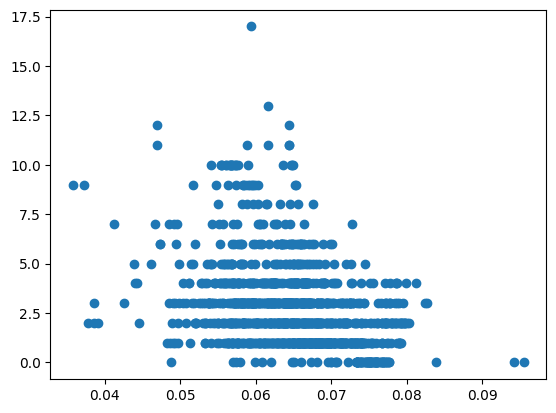

In [84]:
plt.scatter(df_merged["score"], df_merged["count_large"])